In [1]:
#Import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
os.chdir("D:\\DS\\Python DS\\Sample\\Time Series Analysis Dataset\\")

In [3]:
#read file
dataset=pd.read_csv("daily-total-female-births.csv")
# pd.read_csv("time.csv")

In [4]:
dataset

,DataDate,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


In [5]:
dataset['DataDate']=pd.to_datetime(dataset["DataDate"], infer_datetime_format=True)
Idataset=dataset.set_index(['DataDate'])

In [6]:
from datetime import datetime
Idataset.head(5)

,Births
DataDate,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


D:\DS\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


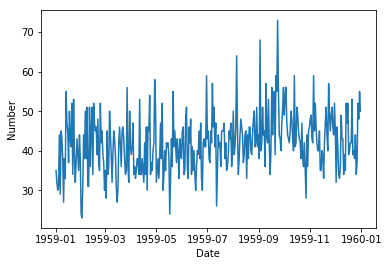

In [7]:
#plot
plt.xlabel("Date")
plt.ylabel("Number")
plt.plot(Idataset)

In [8]:
#rolling for 12 months
rolmean=Idataset.rolling(window=12).mean()
rolstd=Idataset.rolling(window=12).std()
print(rolmean, rolstd)

               Births
DataDate             
1959-01-01        NaN
1959-01-02        NaN
1959-01-03        NaN
1959-01-04        NaN
1959-01-05        NaN
1959-01-06        NaN
1959-01-07        NaN
1959-01-08        NaN
1959-01-09        NaN
1959-01-10        NaN
1959-01-11        NaN
1959-01-12  35.416667
1959-01-13  37.083333
1959-01-14  38.333333
1959-01-15  39.583333
1959-01-16  40.083333
1959-01-17  40.583333
1959-01-18  41.750000
1959-01-19  41.416667
1959-01-20  42.166667
1959-01-21  41.833333
1959-01-22  44.000000
1959-01-23  44.083333
1959-01-24  44.000000
1959-01-25  42.500000
1959-01-26  42.166667
1959-01-27  41.666667
1959-01-28  41.500000
1959-01-29  41.000000
1959-01-30  40.583333
...               ...
1959-12-02  46.166667
1959-12-03  46.333333
1959-12-04  46.416667
1959-12-05  44.500000
1959-12-06  43.166667
1959-12-07  42.416667
1959-12-08  42.416667
1959-12-09  41.750000
1959-12-10  41.500000
1959-12-11  40.666667
1959-12-12  39.583333
1959-12-13  38.750000
1959-12-14

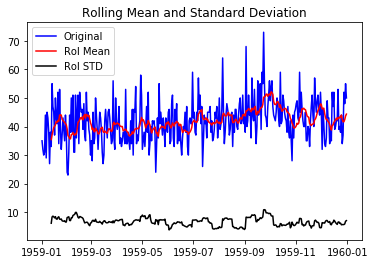

In [9]:
#Rolling Mean and Standard Deviation
orig=plt.plot(Idataset, color="blue", label="Original")
mean=plt.plot(rolmean, color="red", label="Rol Mean")
std=plt.plot(rolstd, color="black", label="Rol STD")
plt.legend(loc="best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

In [11]:

#Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print("Augmented Dickey Fuller Test")
dftest=adfuller(Idataset["Births"], autolag="AIC")
dfoutput=pd.Series(dftest[0:4], index=["ADF Test Statistic", "P-Value", "#Lags", "#obs"])
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key] = value
print(dfoutput)

Augmented Dickey Fuller Test
ADF Test Statistic       -4.808291
P-Value                   0.000052
#Lags                     6.000000
#obs                    358.000000
Critical Value (1%)      -3.448749
Critical Value (5%)      -2.869647
Critical Value (10%)     -2.571089
dtype: float64


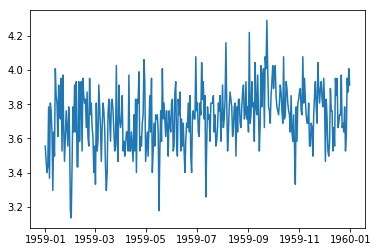

In [12]:
#Trend - Y value Changed
Idataset_log = np.log(Idataset)
plt.plot(Idataset_log)

In [13]:
Idataset_log.head(10)
Idataset_log.isnull().sum()

Births    0
dtype: int64

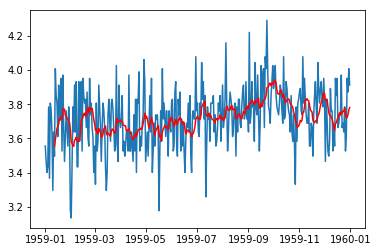

In [14]:
#Moving for 12 months
mavg=Idataset_log.rolling(window=12).mean()
mstd=Idataset_log.rolling(window=12).std()
plt.plot(Idataset_log)
plt.plot(mavg, color="red")

In [15]:
#remove Nan
Idataset_log_mvavg=Idataset_log-mavg
Idataset_log_mvavg.head(12)

,Births
DataDate,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
1959-01-06,NaN
1959-01-07,NaN
1959-01-08,NaN
1959-01-09,NaN


In [16]:
#Remove NAN
Idataset_log_mvavg.dropna(inplace=True)
Idataset_log_mvavg.head(10)

,Births
DataDate,
1959-01-12,-0.057087
1959-01-13,0.416073
1959-01-14,0.226853
1959-01-15,0.149580
1959-01-16,-0.060909
1959-01-17,0.229543
1959-01-18,0.045895
1959-01-19,0.006024
1959-01-20,0.227859


In [29]:
#ADF Test Function
def test_stats(timeseries):
    
    #rolling Statistic
    mavg=timeseries.rolling(window=12).mean()
    mstd=timeseries.rolling(window=12).std()
    
    #Plot
    #Rolling Mean and Standard Deviation
    orig=plt.plot(Idataset, color="blue", label="Original")
    mean=plt.plot(rolmean, color="red", label="Rol Mean")
    std=plt.plot(rolstd, color="black", label="Rol STD")
    plt.legend(loc="best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block=False)

    #Augmented Dickey Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print("Augmented Dickey Fuller Test")
    dftest=adfuller(Idataset["Births"], autolag="AIC")
    dfoutput=pd.Series(dftest[0:4], index=["ADF Test Statistic", "P-Value", "#Lags", "#obs"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    print(dfoutput)

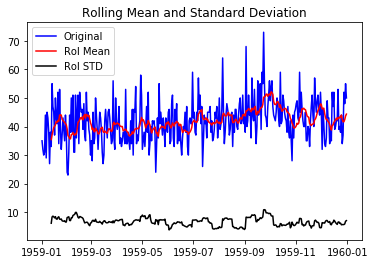

Augmented Dickey Fuller Test
ADF Test Statistic       -4.808291
P-Value                   0.000052
#Lags                     6.000000
#obs                    358.000000
Critical Value (1%)      -3.448749
Critical Value (5%)      -2.869647
Critical Value (10%)     -2.571089
dtype: float64


In [30]:
#plot
test_stats(Idataset_log_mvavg)

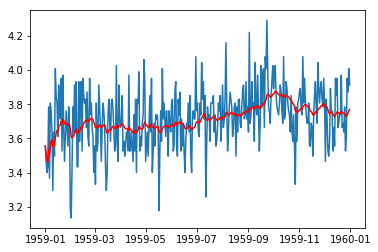

In [31]:
#Exponential Decay Weighted Avg
wavg=Idataset_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(Idataset_log)
plt.plot(wavg, color="red")

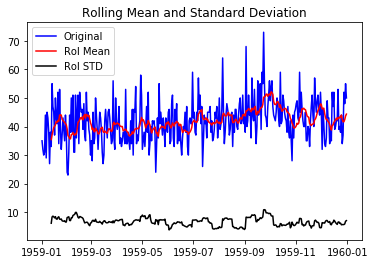

Augmented Dickey Fuller Test
ADF Test Statistic       -4.808291
P-Value                   0.000052
#Lags                     6.000000
#obs                    358.000000
Critical Value (1%)      -3.448749
Critical Value (5%)      -2.869647
Critical Value (10%)     -2.571089
dtype: float64


In [32]:
#dataset Scale - Wavg
d_avg=Idataset_log- wavg
test_stats(d_avg)

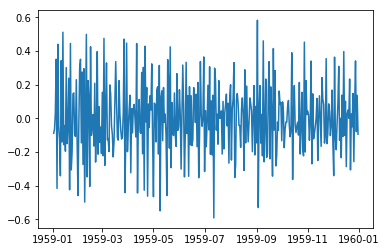

In [33]:
#check - D value - Intigrated
Idataset_log_diff=Idataset_log - Idataset_log.shift()
plt.plot(Idataset_log_diff)

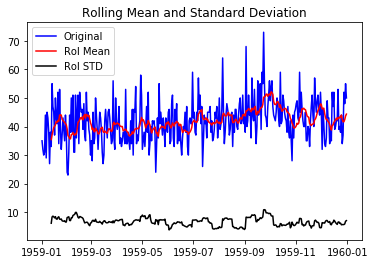

Augmented Dickey Fuller Test
ADF Test Statistic       -4.808291
P-Value                   0.000052
#Lags                     6.000000
#obs                    358.000000
Critical Value (1%)      -3.448749
Critical Value (5%)      -2.869647
Critical Value (10%)     -2.571089
dtype: float64


,Births
DataDate,
1959-01-02,-0.089612
1959-01-03,-0.064539
1959-01-04,0.032790
1959-01-05,0.350202
1959-01-06,-0.416894
1959-01-07,0.439367
1959-01-08,-0.045462
1959-01-09,-0.123614
1959-01-10,-0.341749


In [34]:
#drop NAN and ADF Test
Idataset_log_diff.dropna(inplace=True)
test_stats(Idataset_log_diff)
Idataset_log_diff.head(10)

In [35]:
Idataset_log.dropna(inplace=True)

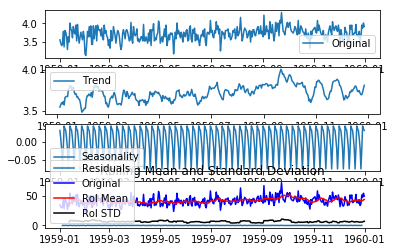

Augmented Dickey Fuller Test
ADF Test Statistic       -4.808291
P-Value                   0.000052
#Lags                     6.000000
#obs                    358.000000
Critical Value (1%)      -3.448749
Critical Value (5%)      -2.869647
Critical Value (10%)     -2.571089
dtype: float64


In [36]:
# #Model
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(Idataset_log)


trend = decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(Idataset_log, label="Original")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc="best")

decomlog=residual
decomlog.dropna(inplace=True)
test_stats(decomlog)

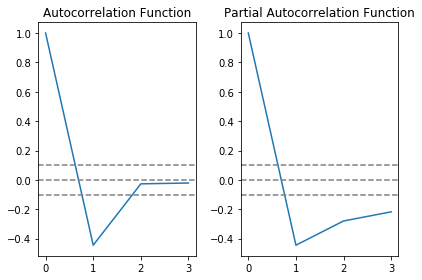

In [52]:
#acf & PACF
from statsmodels.tsa.stattools import acf, pacf
# Idataset_log_diff.fillna(Idataset_log_diff.mean())
lag_acf = acf(Idataset_log_diff, nlags=3)
lag_pacf = pacf(Idataset_log_diff, nlags=3, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Idataset_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Idataset_log_diff)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")

#Plot ACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Idataset_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Idataset_log_diff)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")

plt.tight_layout()



Plotting AR Model


D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


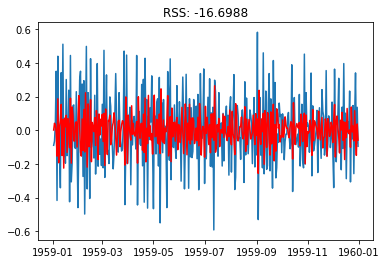

In [78]:
#Arima
from statsmodels.tsa.arima_model import ARIMA

#AR
model=ARIMA(Idataset_log, order=(1,1,0))
result_AR=model.fit(disp=-1)
plt.plot(Idataset_log_diff)
plt.plot(result_AR.fittedvalues, color="red")
plt.title("RSS: %.4F" %sum((result_AR.fittedvalues - Idataset_log_diff["Births"]**2)))
print("Plotting AR Model")

D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting MA Model


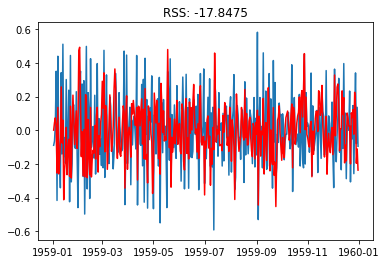

In [79]:
#MA
model=ARIMA(Idataset_log, order=(0,1,1))
result_MA=model.fit(disp=-1)
plt.plot(Idataset_log_diff)
plt.plot(result_MA.fittedvalues, color="red")
plt.title("RSS: %.4F" %sum((result_MA.fittedvalues - Idataset_log_diff["Births"]**2)))
print("Plotting MA Model")

D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\DS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting ARIMA Model


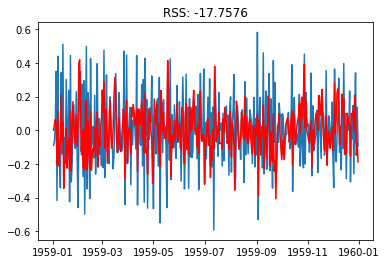

In [80]:
#ARIMA
model=ARIMA(Idataset_log, order=(1,1,1))
result_ARIMA=model.fit(disp=-1)
plt.plot(Idataset_log_diff)
plt.plot(result_ARIMA.fittedvalues, color="red")
plt.title("RSS: %.4F" %sum((result_ARIMA.fittedvalues - Idataset_log_diff["Births"]**2)))
print("Plotting ARIMA Model")

In [86]:
pred_arima_diff=pd.Series(result_ARIMA.fittedvalues, copy=True)
print(pred_arima_diff.head())

DataDate
1959-01-02    0.000405
1959-01-03    0.038337
1959-01-04    0.062550
1959-01-05    0.028424
1959-01-06   -0.206382
dtype: float64


In [90]:
p_arima_diff_cumsum=pred_arima_diff.cumsum()
print(p_arima_diff_cumsum)

DataDate
1959-01-02    0.000405
1959-01-03    0.038742
1959-01-04    0.101291
1959-01-05    0.129715
1959-01-06   -0.076667
1959-01-07    0.035569
1959-01-08   -0.177587
1959-01-09   -0.331844
1959-01-10   -0.378227
1959-01-11   -0.165059
1959-01-12   -0.228160
1959-01-13   -0.178421
1959-01-14   -0.523616
1959-01-15   -0.722452
1959-01-16   -0.873813
1959-01-17   -0.862619
1959-01-18   -1.087485
1959-01-19   -1.180607
1959-01-20   -1.230747
1959-01-21   -1.465890
1959-01-22   -1.351975
1959-01-23   -1.596100
1959-01-24   -1.584182
1959-01-25   -1.414538
1959-01-26   -1.368020
1959-01-27   -1.443502
1959-01-28   -1.437227
1959-01-29   -1.343918
1959-01-30   -1.437969
1959-01-31   -1.410055
                ...   
1959-12-02   -2.062242
1959-12-03   -1.780126
1959-12-04   -1.801834
1959-12-05   -1.728271
1959-12-06   -1.502355
1959-12-07   -1.256646
1959-12-08   -1.087503
1959-12-09   -1.174843
1959-12-10   -1.152680
1959-12-11   -1.130672
1959-12-12   -0.916066
1959-12-13   -0.818526
19

In [95]:
p_arima_log=pd.Series(Idataset_log["Births"].ix[0], index=Idataset_log.index)
p_arima_log=p_arima_log.add(p_arima_diff_cumsum, fill_value=0)
p_arima_log.head()

D:\DS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


DataDate
1959-01-01    3.555348
1959-01-02    3.555753
1959-01-03    3.594090
1959-01-04    3.656640
1959-01-05    3.685063
dtype: float64

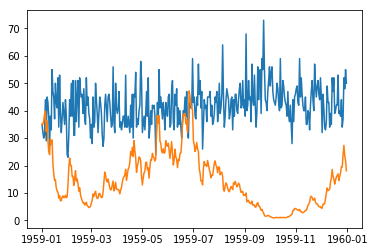

In [96]:
p_arima=np.exp(p_arima_log)
plt.plot(Idataset)
plt.plot(p_arima)

In [97]:
#Prediction
Idataset_log

,Births
DataDate,
1959-01-01,3.555348
1959-01-02,3.465736
1959-01-03,3.401197
1959-01-04,3.433987
1959-01-05,3.784190
1959-01-06,3.367296
1959-01-07,3.806662
1959-01-08,3.761200
1959-01-09,3.637586


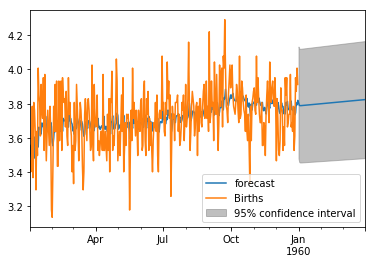

In [99]:
result_ARIMA.plot_predict(1,455)
x=result_ARIMA.forecast(steps=90)